# World Happines Analysis

## Content
### 01. Importing libraries and data
### 02. Exploring relationship
### 2.1 Creating correlation matrix
### 2.2 Creating a correlation heatmap
### 2.3 Creating Scatterplots
### 2.4 Creating a Pair Plot
### 2.5 Creating a Categorical plot

In [3]:
## 01. Importing libraries and data

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
# Create Path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/World Happiness/02 Data/Prepared Data/"

In [6]:
# Import data
wh_merged=pd.read_csv(os.path.join(path, 'wh_merged.csv'))

In [7]:
wh_merged.shape

(1367, 13)

In [8]:
wh_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1367 non-null   int64  
 1   country                      1367 non-null   object 
 2   year                         1367 non-null   int64  
 3   happiness_rank               1367 non-null   int64  
 4   happiness_score              1367 non-null   float64
 5   economy_GDP_per_capita       1367 non-null   float64
 6   family                       1367 non-null   float64
 7   health_life_expectancy       1367 non-null   float64
 8   freedom                      1367 non-null   float64
 9   trust_government_corruption  1367 non-null   float64
 10  generosity                   1367 non-null   float64
 11  dystopia_residual            1367 non-null   float64
 12  File_Name                    1367 non-null   object 
dtypes: float64(8), int

In [9]:
# Drop irrelevant columns
wh_merged.drop(columns=['Unnamed: 0', 'File_Name'])

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),2023,133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,0.00000
1363,Zimbabwe,2023,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.00000
1364,Sierra Leone,2023,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,0.00000
1365,Lebanon,2023,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,0.00000


In [10]:
wh_merged=wh_merged.drop(columns=['Unnamed: 0', 'File_Name'])

In [11]:
wh_merged.shape

(1367, 11)

## 02. Exploring relationship

### 2.1 Creating correlation matrix

In [14]:
# Create a suibset sutable for exploring correlation between variables
subset_wh_cor=wh_merged[['happiness_rank', 'happiness_score', 'economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom']]

In [15]:
subset_wh_cor.shape

(1367, 6)

In [16]:
subset_wh_cor.corr()

,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom
happiness_rank,1.000000,-0.986526,-0.736792,-0.645940,-0.680603,-0.556359
happiness_score,-0.986526,1.000000,0.723810,0.648155,0.682349,0.569458
economy_GDP_per_capita,-0.736792,0.723810,1.000000,0.522092,0.564934,0.439453
family,-0.645940,0.648155,0.522092,1.000000,0.561133,0.364927
health_life_expectancy,-0.680603,0.682349,0.564934,0.561133,1.000000,0.261372
freedom,-0.556359,0.569458,0.439453,0.364927,0.261372,1.000000


### 2.2 Creating a correlation heatmap

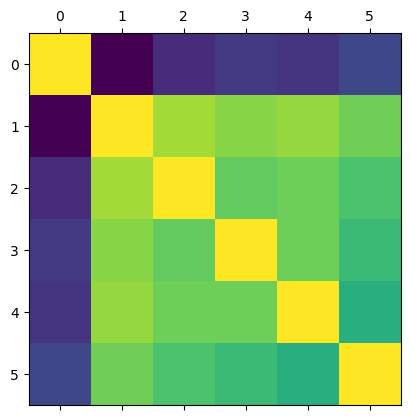

In [18]:
plt.matshow(subset_wh_cor.corr())
plt.show()

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_21844\2034164601.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


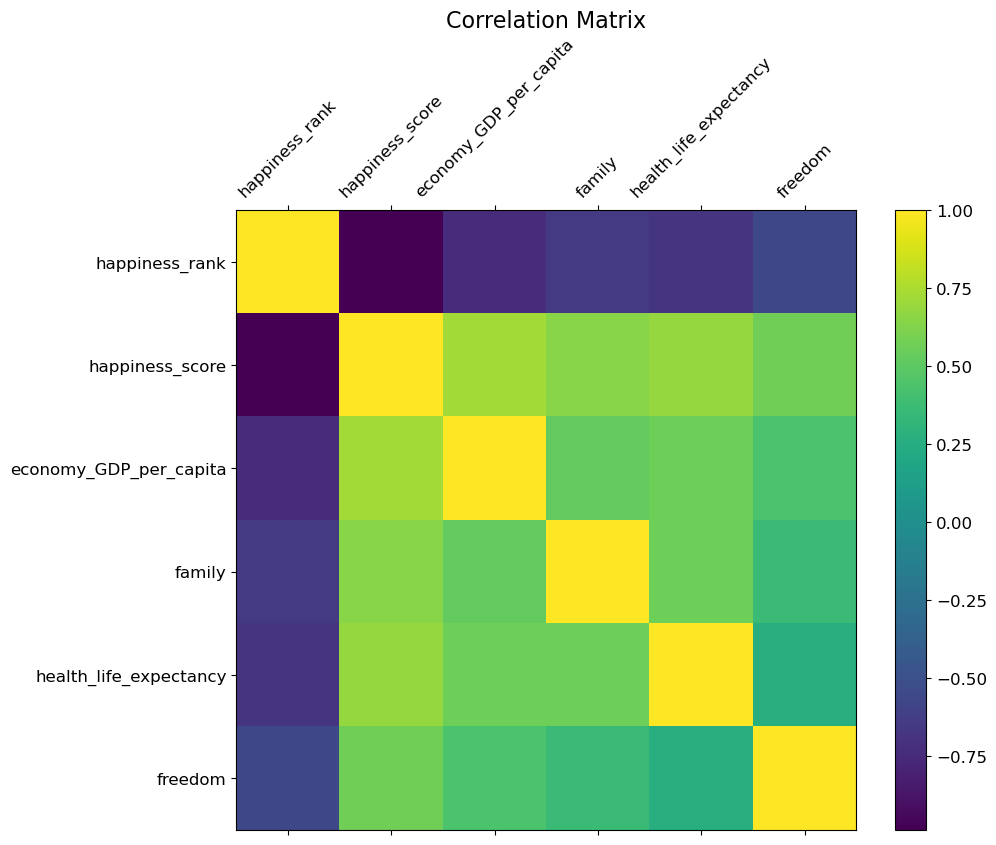

In [19]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(10, 8)) # figure size 
plt.matshow(subset_wh_cor.corr(), fignum=f.number) # type of plot
plt.xticks(range(subset_wh_cor.shape[1]), subset_wh_cor.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(subset_wh_cor.shape[1]), subset_wh_cor.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=16) # add title
plt.tight_layout()

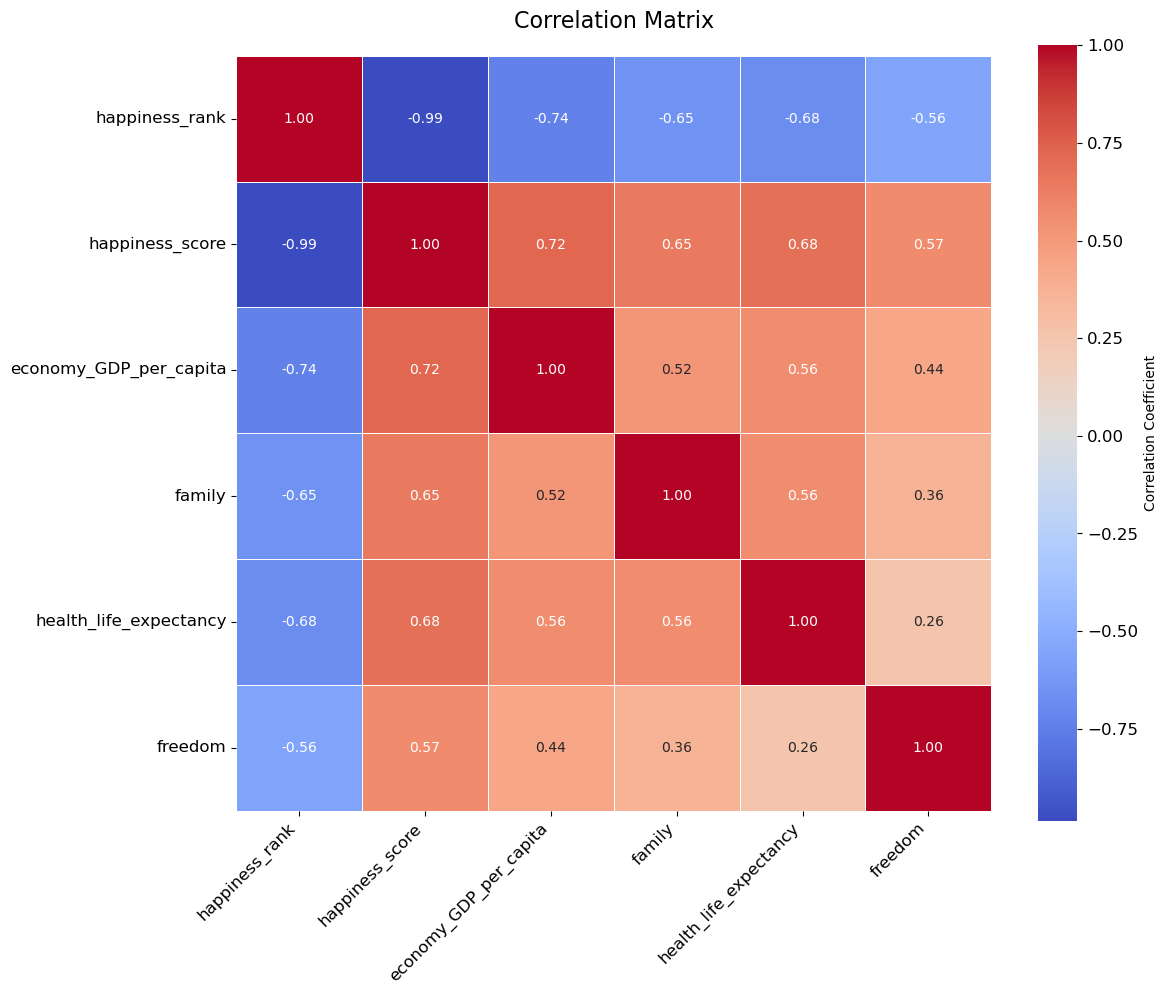

In [21]:
# Create a correlation heatmap using seaborn
f,ax = plt.subplots(figsize=(12,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset_wh_cor.corr(), annot=True, fmt=".2f", cmap='coolwarm', 
                   cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5, 
                   ax=ax, square=True, annot_kws={"size": 10}) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
ax.set_title('Correlation Matrix', fontsize=16, pad=20) # Set the title and adjust its position

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12) # Adjust the colorbar font size

plt.tight_layout()
plt.show()

In [22]:
# Save the heatmap to a file
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [23]:
# Create Path for saving visualizations
path_viz="C:/Users/Oksana Stepanova/OneDrive/Документи/World Happiness/04 Analysis/Visualizations/"

In [28]:
corr.figure.savefig(os.path.join(path_viz, 'correlation_heatmap.png'), bbox_inches='tight')

#### 1- Between the happiness score and the four happiness indicators, the highest level of correlation is with GDP per capita. The reason may be that GDP is a widely used indicator, it can be calculated using an accurate formula, and it is the least subjective among the six indicators used to rank happiness.

#### 2- Besides GDP per capita, a strong correlation is noted between the happiness score and health and life expectancy – 0.68, family (or social relationship) – 0.65, freedom of choice 0.57. Such indicators as social relationship and freedom of choice are subjective factors, nevertheless, when answering the survey questions, the correspondents are more or less objective as this is related to their personal experience.

#### 3- All four happiness indicators have positive correlation with the happiness score. As long as an indicator is going up, the people feel happier. 

### 2.3 Creating Scatterplots

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


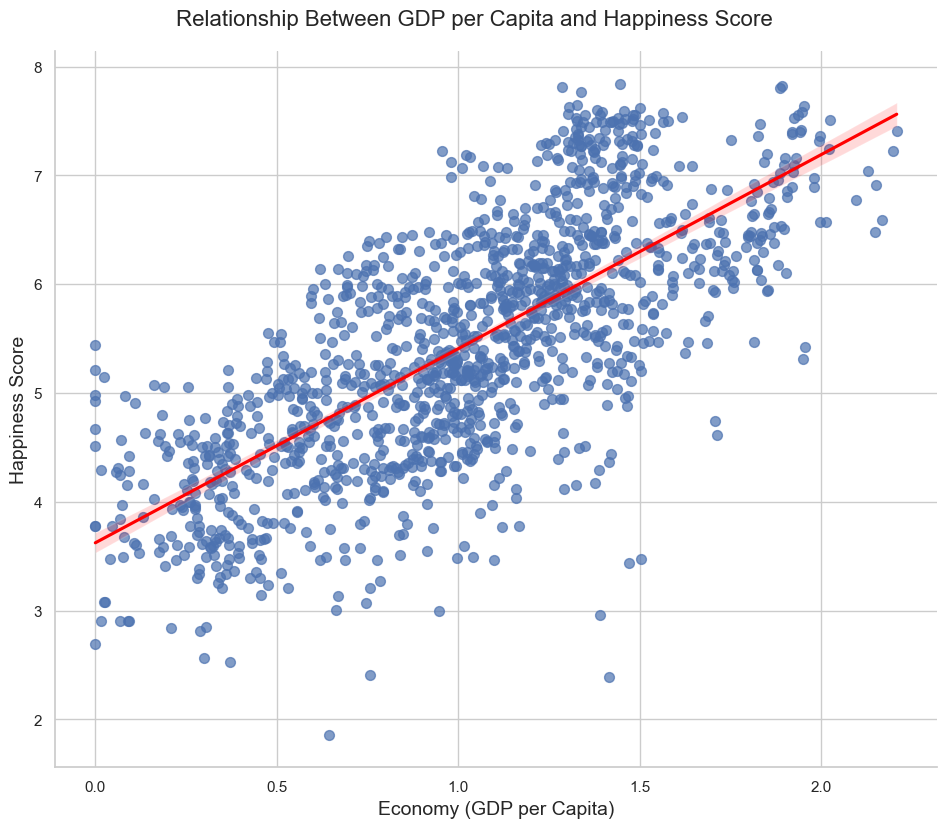

In [49]:
# Create a scatterplot for the "happiness_score" and "economy_GDP_per_capita" columns in seaborn

sns.set(style="whitegrid") # Set the style and palette
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

corr_GDP=sns.lmplot(x='economy_GDP_per_capita', y='happiness_score', data=wh_merged, palette=custom_palette, 
                      height=8, aspect=1.2, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})

# Customize the plot
corr_GDP.set_axis_labels('Economy (GDP per Capita)', 'Happiness Score', fontsize=14)
corr_GDP.fig.suptitle('Relationship Between GDP per Capita and Happiness Score', fontsize=16, y=1.03)

plt.show()

In [36]:
corr_GDP.savefig(os.path.join(path_viz, 'corr_happiness_gdp.png'), bbox_inches='tight')

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


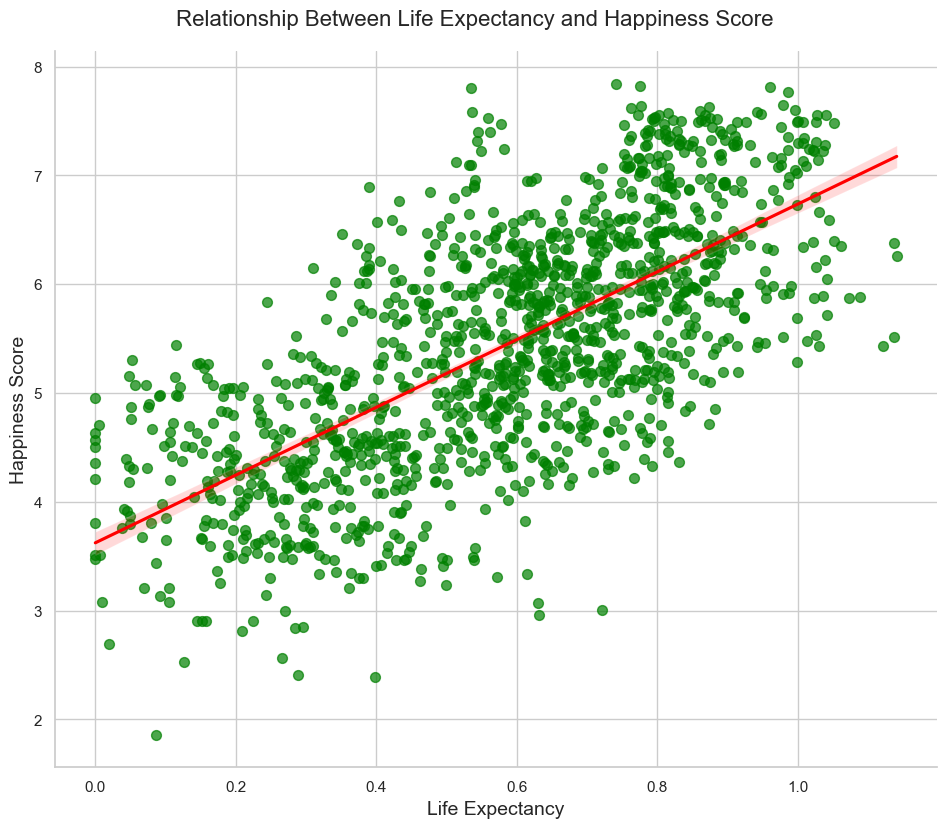

In [50]:
# Create a scatterplot for the "happiness_score" and "health_life_expectancy" columns in seaborn

sns.set(style="whitegrid") # Set the style and palette

corr_health=sns.lmplot(x='health_life_expectancy', y='happiness_score', data=wh_merged, palette="dark", 
                      height=8, aspect=1.2, scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'green'}, line_kws={'color': 'red'})

# Customize the plot
corr_health.set_axis_labels('Life Expectancy', 'Happiness Score', fontsize=14)
corr_health.fig.suptitle('Relationship Between Life Expectancy and Happiness Score', fontsize=16, y=1.03)

plt.show()

In [51]:
# Export scatterplot 
corr_health.savefig(os.path.join(path_viz, 'corr_happiness_health.png'), bbox_inches='tight')

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


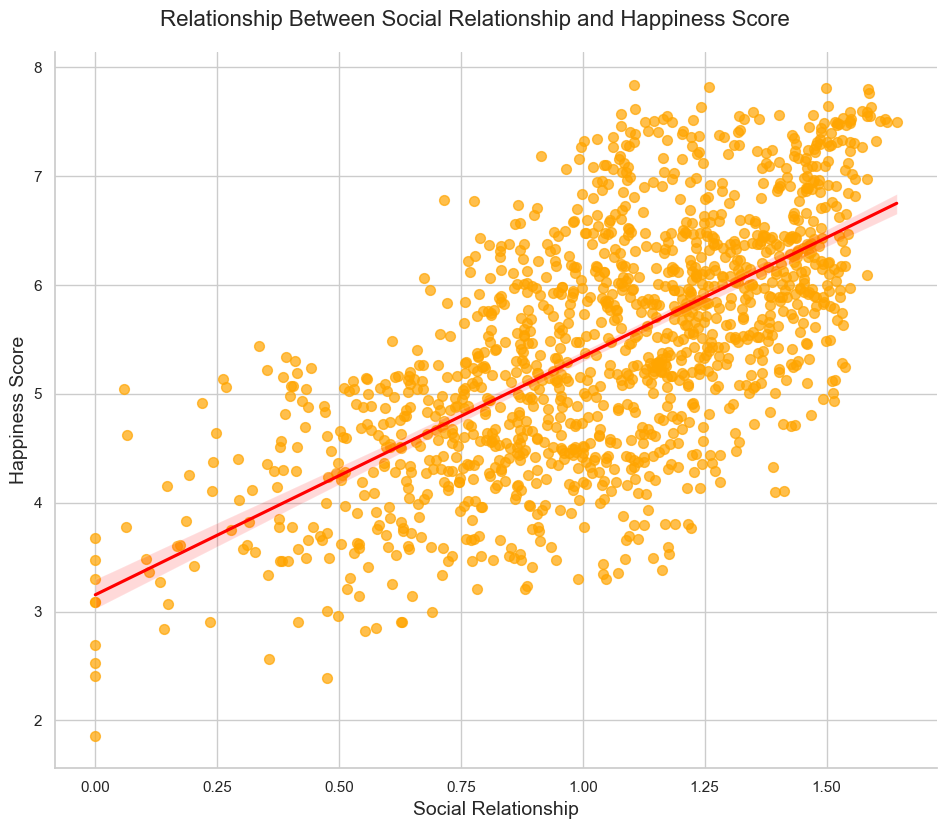

In [55]:
# Create a scatterplot for the "happiness_score" and "family" columns in seaborn

sns.set(style="whitegrid") # Set the style and palette

corr_family=sns.lmplot(x='family', y='happiness_score', data=wh_merged, palette="hot", 
                      height=8, aspect=1.2, scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'orange'}, line_kws={'color': 'red'})

# Customize the plot
corr_family.set_axis_labels('Social Relationship', 'Happiness Score', fontsize=14)
corr_family.fig.suptitle('Relationship Between Social Relationship and Happiness Score', fontsize=16, y=1.03)

plt.show()

In [56]:
# Export scatterplot 
corr_family.savefig(os.path.join(path_viz, 'corr_happiness_family.png'), bbox_inches='tight')

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


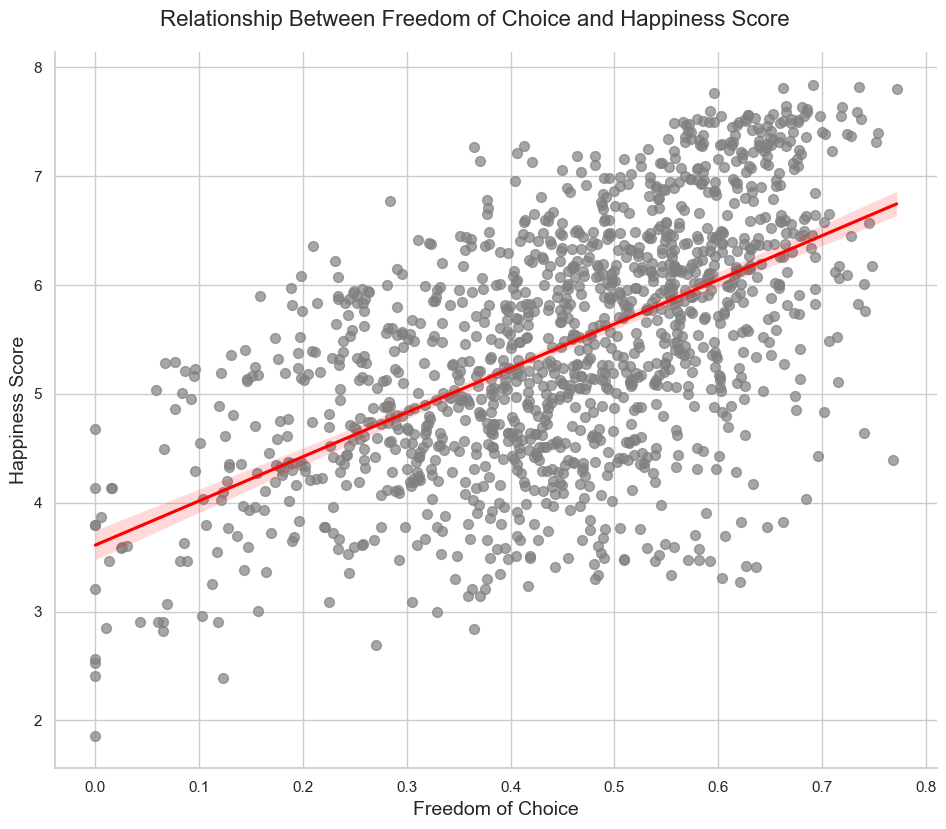

In [61]:
# Create a scatterplot for the "happiness_score" and " freedom" columns in seaborn

sns.set(style="whitegrid") # Set the style and palette

corr_freedom=sns.lmplot(x='freedom', y='happiness_score', data=wh_merged, palette="colorblind", 
                      height=8, aspect=1.2, scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'grey'}, line_kws={'color': 'red'})

# Customize the plot
corr_freedom.set_axis_labels('Freedom of Choice', 'Happiness Score', fontsize=14)
corr_freedom.fig.suptitle('Relationship Between Freedom of Choice and Happiness Score', fontsize=16, y=1.03)

plt.show()

In [62]:
# Export scatterplot 
corr_freedom.savefig(os.path.join(path_viz, 'corr_happiness_freedome.png'), bbox_inches='tight')

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

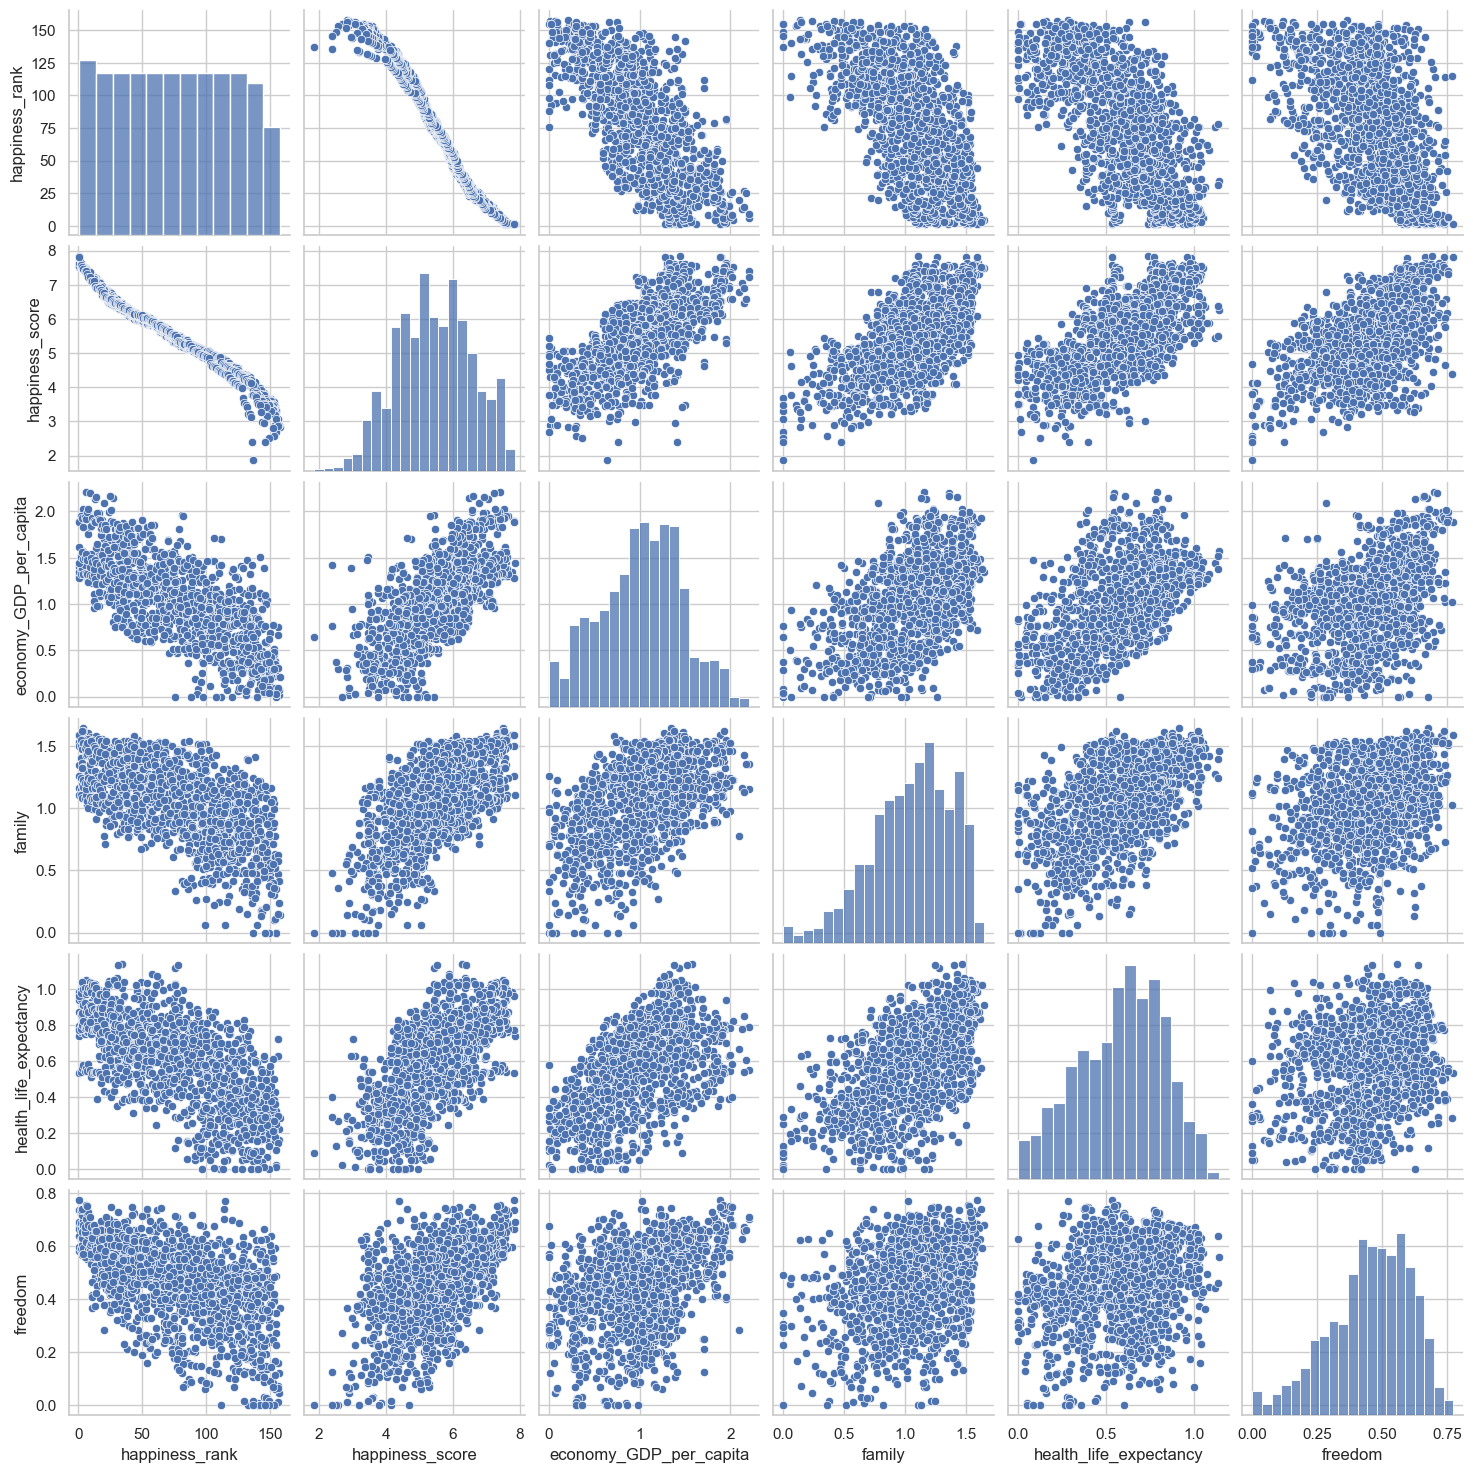

In [63]:
# Create a pair plot 
pair_plot=sns.pairplot(subset_wh_cor)

In [65]:
pair_plot.savefig(os.path.join(path_viz, 'pair_plot.png'), bbox_inches='tight')

#### The Happiness Score is evenly distributed. 
#### The GDP and life Expectancy are pretty evenly distributed as well. 
#### The family (social relationship) and freedom are skewed right.

## 2.5 Creating a Categorical Plot

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='happiness_score', ylabel='Count'>

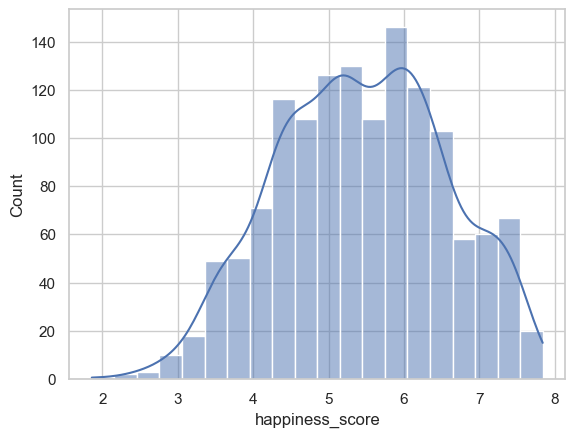

In [68]:
# Create a histogram of happiness_score 
sns.histplot(subset_wh_cor['happiness_score'], bins=20, kde=True)

In [69]:
# Split a categorical variable 'happiness_score' into happiness categories
wh_merged.loc[wh_merged['happiness_score']<4, 'happiness_category']='low'

In [70]:
wh_merged.loc[(wh_merged['happiness_score']>=4) & (wh_merged['happiness_score']<5.5), 'happiness_category']='middle-low'

In [71]:
wh_merged.loc[(wh_merged['happiness_score']>=5.5) & (wh_merged['happiness_score']<7), 'happiness_category']='middle-high'

In [72]:
wh_merged.loc[wh_merged['happiness_score']>=7, 'happiness_category']='high'

In [73]:
wh_merged['happiness_category'].value_counts(dropna=False)

happiness_category
middle-low     560
middle-high    530
low            144
high           133
Name: count, dtype: int64

In [74]:
wh_merged.columns

Index(['country', 'year', 'happiness_rank', 'happiness_score',
       'economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual',
       'happiness_category'],
      dtype='object')

In [75]:
# Aggregate the data and calculate the average happiness score by country   
wh_agg=wh_merged.groupby('country').agg({'happiness_score': 'mean'}).reset_index()

In [76]:
# Sort the aggregated data by the average happiness score in descending order
wh_agg = wh_agg.sort_values(by='happiness_score', ascending=False)

In [77]:
# Rename the columns
wh_agg.columns=['country', 'happiness_score']

In [78]:
wh_agg.head(10)

,country,happiness_score
47,Finland,7.662744
38,Denmark,7.579733
61,Iceland,7.522278
142,Switzerland,7.493322
110,Norway,7.473889
103,Netherlands,7.417100
141,Sweden,7.343500
104,New Zealand,7.273844
25,Canada,7.230456
6,Australia,7.227089


In [79]:
# Create a subset of top-10 countries with the highest happiness score
top_10_countries=['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Norway', 'Netherlands', 'Sweden', 'New Zealand', 'Canada', 'Australia']
subset_wh_10_countries=wh_merged.loc[wh_merged['country'].isin(top_10_countries)]

In [80]:
subset_wh_10_countries.head()

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,high
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,high
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,high


In [81]:
subset_wh_10_countries.shape

(90, 12)

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Switzerland'),
  Text(1, 0, 'Iceland'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Norway'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'New Zealand'),
  Text(9, 0, 'Australia')])

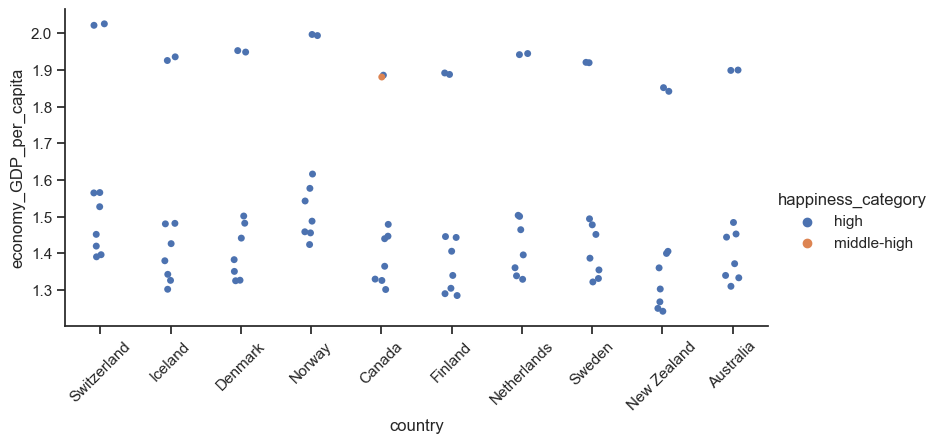

In [82]:
# Create a categorical plot in seaborn using the happiness categories and GDP factor
sns.set(style="ticks")
cat_plot = sns.catplot(x="country", y="economy_GDP_per_capita", hue="happiness_category", height=4, aspect=2, data=subset_wh_10_countries)
plt.xticks(rotation=45)

In [83]:
# Aggregate the data and calculate the average economy_GDP_per_capita by country   
wh_agg_GDP=wh_merged.groupby('country').agg({'economy_GDP_per_capita': 'mean'}).reset_index()

In [84]:
# Sort the aggregated data by the average GDP score in descending order
wh_agg_GDP = wh_agg_GDP.sort_values(by='economy_GDP_per_capita', ascending=False)

In [85]:
# Rename the columns
wh_agg_GDP.columns=['country', 'economy_GDP_per_capita']

In [86]:
wh_agg_GDP.head(10)

,country,economy_GDP_per_capita
85,Luxembourg,1.765006
121,Qatar,1.743691
129,Singapore,1.721363
155,United Arab Emirates,1.691691
66,Ireland,1.630440
110,Norway,1.617235
142,Switzerland,1.596177
157,United States,1.572080
76,Kuwait,1.571018
59,Hong Kong,1.566796


In [105]:
# Create a subset of top-10 countries with the highest GDP score
top_10_countries_GDP=['Luxembourg', 'Qatar', 'Singapore', 'United Arab Emirates', 'Ireland', 'Norway', 'Switzerland', 'United States', 'Kuwait', 'Hong Kong']
subset_wh_10_countries_GDP=wh_merged.loc[wh_merged['country'].isin(top_10_countries_GDP)]

In [108]:
subset_wh_10_countries_GDP.head()

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
14,United States,2015,15,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011,high
16,Luxembourg,2015,17,6.946,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961,middle-high
17,Ireland,2015,18,6.940,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,middle-high


In [109]:
subset_wh_10_countries_GDP.shape

(85, 12)

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Switzerland'),
  Text(1, 0, 'Norway'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Luxembourg'),
  Text(4, 0, 'Ireland'),
  Text(5, 0, 'United Arab Emirates'),
  Text(6, 0, 'Singapore'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Kuwait'),
  Text(9, 0, 'Hong Kong')])

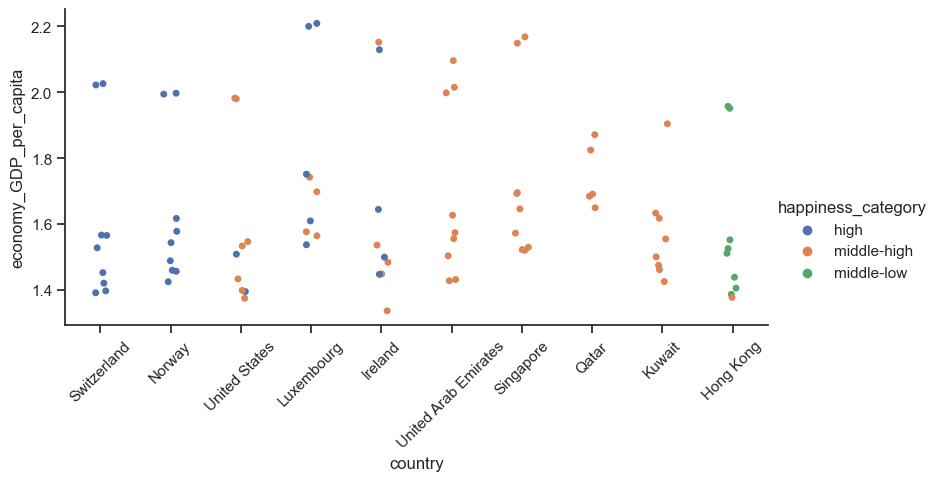

In [110]:
# Create a categorical plot in seaborn using the happiness categories and GDP factor
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x="country", y="economy_GDP_per_capita", hue="happiness_category", height=4, aspect=2, data=subset_wh_10_countries_GDP)
plt.xticks(rotation=45)

In [111]:
cat_plot_GDP.savefig(os.path.join(path_viz, 'category_happiness_GDP.png'), bbox_inches='tight')

#### The categorical plot shows that the high level of GDP doesn't insure the highest hapinnes score. 
#### There are significant number of data points classified as middle-high or middle-low level of happiness score   

In [112]:
# Aggregate the data and calculate the average fredom score by country   
wh_agg_freedom=wh_merged.groupby('country').agg({'freedom': 'mean'}).reset_index()

In [113]:
# Sort the aggregated data by the average freedom score in descending order
wh_agg_freedom = wh_agg_freedom.sort_values(by='freedom', ascending=False)

In [114]:
# Rename the columns
wh_agg_freedom.columns=['country', 'freedom']

In [115]:
wh_agg_freedom.head(10)

,country,freedom
159,Uzbekistan,0.682801
23,Cambodia,0.674922
110,Norway,0.671494
47,Finland,0.663222
38,Denmark,0.659315
61,Iceland,0.656239
141,Sweden,0.655689
104,New Zealand,0.639189
142,Switzerland,0.637796
111,Oman,0.632740


In [116]:
# Create a subset of top-10 countries with the highest freedom score
top_10_countries_freedom=['Uzbekistan', 'Cambodia', 'Norway', 'Finland', 'Denmark', 'Iceland', 'Sweden', 'New Zealand', 'Switzerland', 'Oman']
subset_wh_10_countries_freedom=wh_merged.loc[wh_merged['country'].isin(top_10_countries_freedom)]

In [117]:
subset_wh_10_countries_freedom.head()

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,high
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,high
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
5,Finland,2015,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,high


In [118]:
subset_wh_10_countries_GDP.shape

(85, 12)

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Switzerland'),
  Text(1, 0, 'Iceland'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Norway'),
  Text(4, 0, 'Finland'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'New Zealand'),
  Text(7, 0, 'Oman'),
  Text(8, 0, 'Uzbekistan'),
  Text(9, 0, 'Cambodia')])

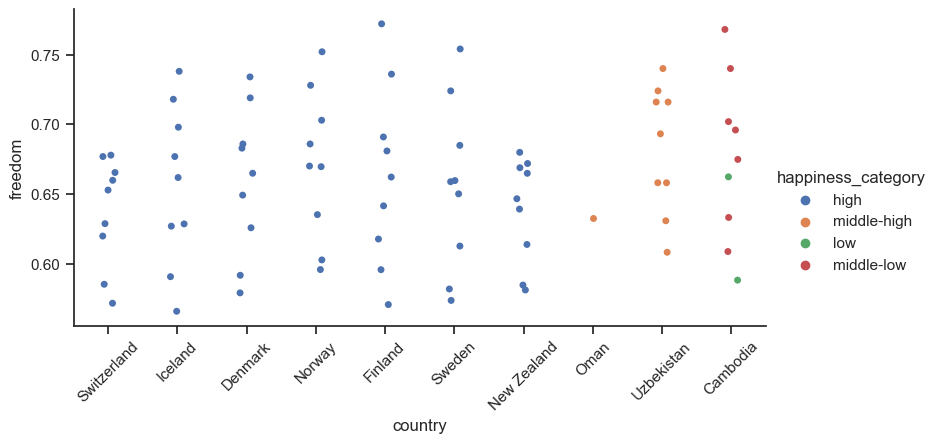

In [119]:
# Create a categorical plot in seaborn using the happiness categories and freedom factor
sns.set(style="ticks")
cat_plot_freedom = sns.catplot(x="country", y="freedom", hue="happiness_category", height=4, aspect=2, data=subset_wh_10_countries_freedom)
plt.xticks(rotation=45)

In [120]:
cat_plot_freedom.savefig(os.path.join(path_viz, 'category_happiness_freedom.png'), bbox_inches='tight')

#### Surprising fact is that the countries reported the highest freedom score such as Uzbekistan and Cambogia are ranked as territories with middle or low happiness level. The reason for this may be the subjective estimation of freedom of choice and the contribution of other factors that affect the happiness of people in these countries.
#### Seven out of ten countries in this list are from The top-10 most happy countries.

In [122]:
# Aggregate the data and calculate the average Life expectancy score by country   
wh_agg_health=wh_merged.groupby('country').agg({'health_life_expectancy': 'mean'}).reset_index()

In [123]:
# Sort the aggregated data by the average freedom score in descending order
wh_agg_health = wh_agg_health.sort_values(by='health_life_expectancy', ascending=False)

In [125]:
# Rename the columns
wh_agg_health.columns=['country', 'health_life_expectancy']

In [126]:
wh_agg_health.head(10)

,country,health_life_expectancy
59,Hong Kong,0.970527
129,Singapore,0.951527
71,Japan,0.921597
109,Northern Cyprus,0.899594
135,South Korea,0.890065
137,Spain,0.889209
142,Switzerland,0.878014
68,Italy,0.869348
36,Cyprus,0.866022
48,France,0.865436


In [127]:
# Create a subset of top-10 countries with the highest Life expectancy score
top_10_countries_health=['Hong Kong', 'Singapore', 'Japan', 'Northern Cyprus', 'South Korea', 'Spain', 'Switzerland', 'Italy', 'Cyprus', 'France']
subset_wh_10_countries_health=wh_merged.loc[wh_merged['country'].isin(top_10_countries_health)]

In [128]:
subset_wh_10_countries_health.head()

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
23,Singapore,2015,24,6.798,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501,middle-high
28,France,2015,29,6.575,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126,middle-high
35,Spain,2015,36,6.329,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367,middle-high
45,Japan,2015,46,5.987,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435,middle-high


In [130]:
subset_wh_10_countries_health.shape

(89, 12)

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Switzerland'),
  Text(1, 0, 'Singapore'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Northern Cyprus'),
  Text(8, 0, 'Cyprus'),
  Text(9, 0, 'Hong Kong')])

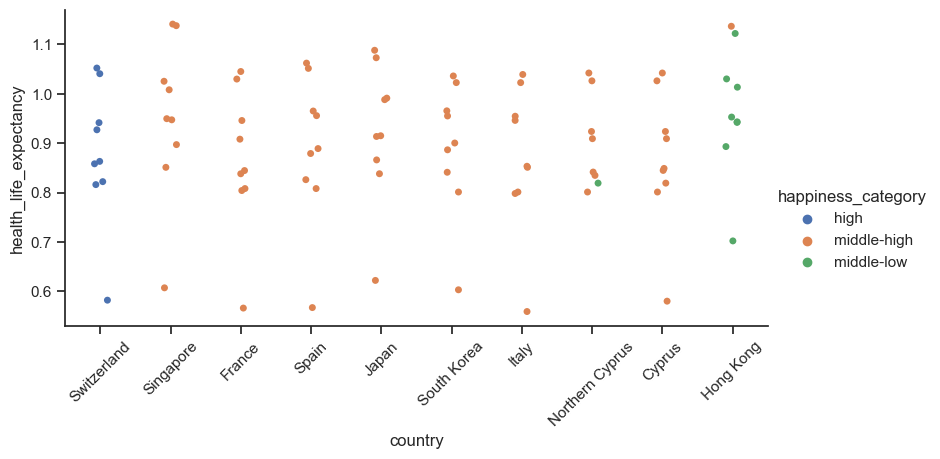

In [131]:
# Create a categorical plot in seaborn using the happiness categories and Life expectancy factor
sns.set(style="ticks")
cat_plot_health = sns.catplot(x="country", y="health_life_expectancy", hue="happiness_category", height=4, aspect=2, data=subset_wh_10_countries_health)
plt.xticks(rotation=45)

In [132]:
cat_plot_health.savefig(os.path.join(path_viz, 'category_happiness_health.png'), bbox_inches='tight')

#### Nine of ten countries which represents the states with high life expectancy score are designated as territories with high or middle-high happiness level.

In [134]:
# Aggregate the data and calculate the average family and social support score by country   
wh_agg_family=wh_merged.groupby('country').agg({'family': 'mean'}).reset_index()

In [135]:
# Sort the aggregated data by the average freedom score in descending order
wh_agg_family = wh_agg_family.sort_values(by='family', ascending=False)

In [136]:
# Rename the columns
wh_agg_family.columns=['country', 'social_support']

In [137]:
wh_agg_family.head(10)

,country,social_support
61,Iceland,1.458181
38,Denmark,1.404543
47,Finland,1.402297
104,New Zealand,1.395429
110,Norway,1.390950
66,Ireland,1.375431
142,Switzerland,1.369674
6,Australia,1.366464
152,Turkmenistan,1.353810
137,Spain,1.353048


In [138]:
# Create a subset of top-10 countries with the highest social support score
top_10_countries_family=['Iceland', 'Denmark', 'Finland', 'New Zealand', 'Norway', 'Ireland', 'Switzerland', 'Australia', 'Turkmenistan', 'Spain']
subset_wh_10_countries_family=wh_merged.loc[wh_merged['country'].isin(top_10_countries_family)]

In [139]:
subset_wh_10_countries_family.head()

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,high
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,high
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
5,Finland,2015,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,high


In [140]:
subset_wh_10_countries_family.shape

(89, 12)

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Switzerland'),
  Text(1, 0, 'Iceland'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Norway'),
  Text(4, 0, 'Finland'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Ireland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Turkmenistan')])

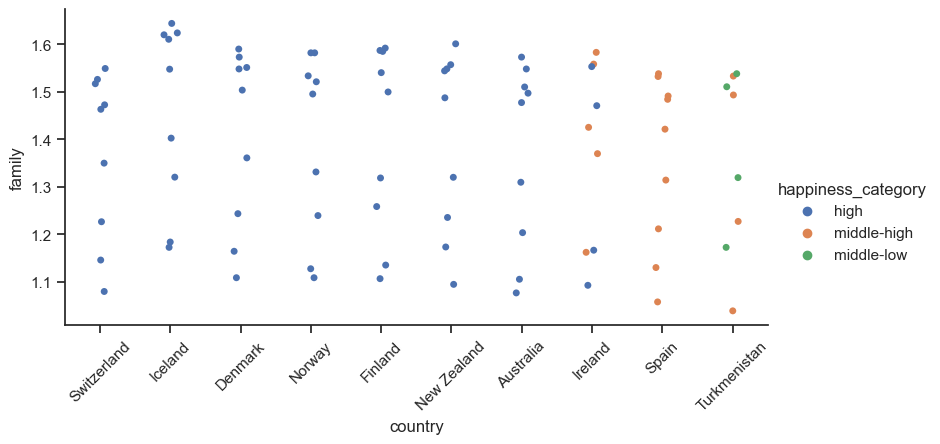

In [141]:
# Create a categorical plot in seaborn using the happiness categories and social support factor
sns.set(style="ticks")
cat_plot_family = sns.catplot(x="country", y="family", hue="happiness_category", height=4, aspect=2, data=subset_wh_10_countries_family)
plt.xticks(rotation=45)

In [142]:
cat_plot_family.savefig(os.path.join(path_viz, 'category_happiness_family.png'), bbox_inches='tight')

#### Most of the countries with high social support score are reported the high or middle-high happiness score. 
#### Seven countries from this list are in the top-10 most happy countries.